<center><h3><strong>AGENTE DE INTELIGÊNCIA ARTIFICIAL PARA ELASTICSEARCH COM LANGGRAPH</strong></h3></center>

In [4]:
from elasticsearch import Elasticsearch
from elasticsearch.helpers import bulk
import json
import getpass

In [6]:
ES_HOST = getpass.getpass("Digite o ES_HOST: ")
ES_USER = "elastic" 
ES_PASSWORD = getpass.getpass("Digite a sua senha: ")
INDEX_NAME = "clientes" # nome do Índice ("banco de dados").

Digite o ES_HOST:  ········
Digite a sua senha:  ········


In [8]:
# Conectando ao Elasticsearch com autenticação 
es = Elasticsearch( 
    ES_HOST, 
    basic_auth=(ES_USER, ES_PASSWORD), 
    verify_certs=True 
) 

# Verificação se o índice já existe 
if es.indices.exists(index=INDEX_NAME): 
    print(f"O índice '{INDEX_NAME}' já existe.") 
else: 
    # mapeamento para definição dos campos do JSON e seus respectivos tipos 
    mapping = { 
        "mappings": { 
            "properties": { 
                "cliente_id": {"type": "integer"}, 
                "nome": {"type": "text"}, 
                "sobrenome": {"type": "text"}, 
                "email": {"type": "keyword"}, 
                "produto": {"type": "keyword"}, 
                "categoria": {"type": "keyword"}, 
                "plano": {"type": "keyword"}, 
                "valor_pago": {"type": "double"} 
            } 
        } 
    } 
    es.indices.create(index=INDEX_NAME, body=mapping) # Criação do Índice "clientes" de acordo com o mapping que foi definido. 

    # Criação de uma base de dados simples que irá popular o Índice "clientes" de acordo com o mapping definido. 
    clientes = [ 
        (1, 'Ana', 'Silva', 'ana.silva@email.com', 'Produto A', 'Vestuário', 'Anual', 5000.00), 
        (2, 'Bruno', 'Oliveira', 'bruno.oliveira@email.com', 'Produto B', 'Vestuário', 'Mensal', 1000.00), 
        (3, 'Carlos', 'Pereira', 'carlos.pereira@email.com', 'Produto C', 'Alimentício', 'Mensal', 3000.00), 
        (4, 'Daniela', 'Costa', 'daniela.costa@email.com', 'Produto D', 'Alimentício', 'Anual', 8000.00), 
        (5, 'Eduardo', 'Lima', 'eduardo.lima@email.com', 'Produto E', 'Limpeza', 'Mensal', 3000.00), 
        (6, 'Paulo', 'Andrade', 'paulo.andrade@email.com', 'Produto D', 'Alimentício', 'Mensal', 7000.00), 
        (7, 'Fernanda', 'Costa', 'fernanda.costa@email.com', 'Produto E', 'Limpeza', 'Anual', 8000.00), 
        (8, 'Lucas', 'Alves', 'lucas.alves@email.com', 'Produto F', 'Limpeza', 'Mensal', 5000.00), 
        (9, 'Julia', 'Pereira', 'julia.pereiraa@email.com', 'Produto A', 'Vestuário', 'Anual', 9000.00), 
        (10, 'Fernanda', 'Costa', 'fernanda.costa@email.com', 'Produto E', 'Limpeza', 'Anual', 3000.00), 
    ] 

    actions = [ 
        { 
            "_index": INDEX_NAME, 
            "_id": cliente[0], 
            "_source": { 
                "cliente_id": cliente[0], 
                "nome": cliente[1], 
                "sobrenome": cliente[2], 
                "email": cliente[3], 
                "produto": cliente[4], 
                "categoria": cliente[5], 
                "plano": cliente[6], 
                "valor_pago": cliente[7] 
            } 
        } 
        for cliente in clientes 
    ] 
    bulk(es, actions) 
    print(f"Índice '{INDEX_NAME}' criado e documentos inseridos com sucesso.") 

# actions cria uma lista de ações. _index define que os dados vão para o Índice "clientes".
# _id busca o cliente_id da tupla "cliente" criada no looping como identificador único.
# _source traz os dados dos clientes.
# looping: para cada cliente, crie um pacote com os seus dados e coloque na lista "actions".
# O comando bulk(es, actions) leva as informações de todos os clientes para o Elasticsearch.

# Consulta 
print("\nConteúdo do índice 'clientes':") 
response = es.search(index=INDEX_NAME, body={"query": {"match_all": {}}}, size=100) 
for hit in response["hits"]["hits"]: 
    print(hit["_source"])

O índice 'clientes' já existe.

Conteúdo do índice 'clientes':


C:\Users\Zerum IT\AppData\Local\Temp\ipykernel_10932\2248310946.py:71: DeprecationWarning: Received 'size' via a specific parameter in the presence of a 'body' parameter, which is deprecated and will be removed in a future version. Instead, use only 'body' or only specific parameters.
  response = es.search(index=INDEX_NAME, body={"query": {"match_all": {}}}, size=100)


{'cliente_id': 1, 'nome': 'Ana', 'sobrenome': 'Silva', 'email': 'ana.silva@email.com', 'produto': 'Produto A', 'categoria': 'Vestuário', 'plano': 'Anual', 'valor_pago': 5000.0}
{'cliente_id': 2, 'nome': 'Bruno', 'sobrenome': 'Oliveira', 'email': 'bruno.oliveira@email.com', 'produto': 'Produto B', 'categoria': 'Vestuário', 'plano': 'Mensal', 'valor_pago': 1000.0}
{'cliente_id': 3, 'nome': 'Carlos', 'sobrenome': 'Pereira', 'email': 'carlos.pereira@email.com', 'produto': 'Produto C', 'categoria': 'Alimentício', 'plano': 'Mensal', 'valor_pago': 3000.0}
{'cliente_id': 4, 'nome': 'Daniela', 'sobrenome': 'Costa', 'email': 'daniela.costa@email.com', 'produto': 'Produto D', 'categoria': 'Alimentício', 'plano': 'Anual', 'valor_pago': 8000.0}
{'cliente_id': 5, 'nome': 'Eduardo', 'sobrenome': 'Lima', 'email': 'eduardo.lima@email.com', 'produto': 'Produto E', 'categoria': 'Limpeza', 'plano': 'Mensal', 'valor_pago': 3000.0}
{'cliente_id': 6, 'nome': 'Paulo', 'sobrenome': 'Andrade', 'email': 'paulo.a

In [9]:
# Consulta e impressão dos dados
response = es.search(index=INDEX_NAME, body={"query": {"match_all": {}}}, size=100)

print(f"\nConteúdo do índice '{INDEX_NAME}':")
for hit in response["hits"]["hits"]:
    print(hit["_source"])

C:\Users\Zerum IT\AppData\Local\Temp\ipykernel_10932\1248979469.py:2: DeprecationWarning: Received 'size' via a specific parameter in the presence of a 'body' parameter, which is deprecated and will be removed in a future version. Instead, use only 'body' or only specific parameters.
  response = es.search(index=INDEX_NAME, body={"query": {"match_all": {}}}, size=100)



Conteúdo do índice 'clientes':
{'cliente_id': 1, 'nome': 'Ana', 'sobrenome': 'Silva', 'email': 'ana.silva@email.com', 'produto': 'Produto A', 'categoria': 'Vestuário', 'plano': 'Anual', 'valor_pago': 5000.0}
{'cliente_id': 2, 'nome': 'Bruno', 'sobrenome': 'Oliveira', 'email': 'bruno.oliveira@email.com', 'produto': 'Produto B', 'categoria': 'Vestuário', 'plano': 'Mensal', 'valor_pago': 1000.0}
{'cliente_id': 3, 'nome': 'Carlos', 'sobrenome': 'Pereira', 'email': 'carlos.pereira@email.com', 'produto': 'Produto C', 'categoria': 'Alimentício', 'plano': 'Mensal', 'valor_pago': 3000.0}
{'cliente_id': 4, 'nome': 'Daniela', 'sobrenome': 'Costa', 'email': 'daniela.costa@email.com', 'produto': 'Produto D', 'categoria': 'Alimentício', 'plano': 'Anual', 'valor_pago': 8000.0}
{'cliente_id': 5, 'nome': 'Eduardo', 'sobrenome': 'Lima', 'email': 'eduardo.lima@email.com', 'produto': 'Produto E', 'categoria': 'Limpeza', 'plano': 'Mensal', 'valor_pago': 3000.0}
{'cliente_id': 6, 'nome': 'Paulo', 'sobrenom

In [12]:
import langchain_openai 
import warnings 
warnings.filterwarnings('ignore') 
import numpy as np 
import pandas as pd 
import os 
from typing_extensions import TypedDict 
from typing import List, Annotated 
from IPython.display import Image, display, HTML 
import matplotlib.pyplot as plt 
import io 
import base64 

# Importações dos módulos do LangGraph 
from langchain_openai.chat_models import ChatOpenAI 
from langgraph.graph import StateGraph, END, START 
from langgraph.checkpoint.memory import MemorySaver 
from langchain_core.messages import SystemMessage, HumanMessage 
from operator import add 
from langchain_openai.chat_models import ChatOpenAI 
from langgraph.graph import StateGraph, END, START 
from langgraph.checkpoint.memory import MemorySaver 
from langchain_core.messages import SystemMessage, HumanMessage 
import os 
from langchain_community.vectorstores import FAISS 
from langchain_core.prompts import ChatPromptTemplate 
from langchain_ollama import ChatOllama 
from langchain_openai import ChatOpenAI 
from langchain.schema.runnable import RunnablePassthrough 
from langchain.schema.output_parser import StrOutputParser 
from langchain.tools import tool
from langchain_groq import ChatGroq

**Definindo o modelo de linguagem que será utilizado**

In [14]:
model = ChatOpenAI(
    openai_api_key=getpass.getpass("Digite sua chave da API da OpenAI: "),
    model_name="gpt-4o"
)

Digite sua chave da API da OpenAI:  ········


**Definindo as ferramentas (tools)**

In [16]:
@tool
def get_index_mapping(index_name):
    """Retorna o mapeamento do índice Elasticsearch"""
    mapping = es.indices.get_mapping(index=index_name)
    schema = f"Índice: {index_name}\nCampos:\n"
    for field, props in mapping[index_name]['mappings']['properties'].items():
        field_type = props.get('type', 'object')
        schema += f" - {field} ({field_type})\n"
    return schema

@tool
def saudacao():
    """Retorna uma mensagem de saudação"""
    print("Olá. Tudo bem?")
    return "Saudação enviada"

tools = [get_index_mapping, saudacao]

- Uma **tool** é uma função Python que **o LLM pode invocar para realizar tarefas específicas que vão além de geração de texto.**

- Ao colocamos o **decorator (@) na função**, o Langchain transforma a minha função em uma **ferramenta estruturada**, que pode ser **chamada e executada pelo LLM**.

- A variavel "tools" é uma **lista com as ferramentas (tools) que o LLM terá a sua disposição**.

A função **get_index_mapping** é responsável por **extrair e formatar o esquema (mapeamento)** do Índice no Elasticsearch. Ela:

- Recebe o nome do Índice Elasticsearch ("clientes") e
- Retorna uma string formatada com o esquema do Índice, mostrando todos os campos e seus tipos (cliente_id (integer) nome (text) ... ).

In [19]:
# Visualização exemplificando
get_index_mapping("clientes")

C:\Users\Zerum IT\AppData\Local\Temp\ipykernel_10932\3873622807.py:2: LangChainDeprecationWarning: The method `BaseTool.__call__` was deprecated in langchain-core 0.1.47 and will be removed in 1.0. Use :meth:`~invoke` instead.
  get_index_mapping("clientes")


'Índice: clientes\nCampos:\n - categoria (keyword)\n - cliente_id (integer)\n - email (keyword)\n - nome (text)\n - plano (keyword)\n - produto (keyword)\n - sobrenome (text)\n - valor_pago (double)\n'

**Bind das ferramentas (tools) ao Modelo de Linguagem (LLM/SLM)**

In [21]:
model_with_tools = model.bind_tools(tools)

- A variável model instancia o Modelo de Linguagem (LLM ou SLM) que será utilizado.

- Já a variável **model_with_tools é o llm com a lista de ferramentas bindada**.

- O método **bind_tools habilita o Modelo de Linguagem (LLM ou SLM) a reconhecer e usar as tools disponíveis** (get_index_mapping e saudacao) quando ele entender que seja necessário.

**Definindo o Estado do Agente e os seus campos**

In [24]:
class AgentState(TypedDict): 
    question: str 
    history: List[str] 
    index_schema: str 
    index_name: str 
    es_query: str 
    reflect: Annotated[List[str], add] 
    accepted: bool 
    revision: int 
    max_revision: int 
    results: List[dict] 
    interpretation: str 
    chart_title: str 
    plot_needed: bool 
    plot_html: str 
    last_query_context: str 
    last_results_summary: str 
    router_result: bool 

- A classe AgentState é o **estado do Grafo**. Ele é um **objeto que será passado entre os Nós do Grafo**. Ele funciona como uma **"ficha de paciente" que cada Nó lê e atualiza**.

- Cada variável (campo) tem um papel específico no fluxo do Agente:

| **Variável**          | **Tipo**         | **Descrição**                                                                                  | **Exemplo de Uso**                                                                                          |
|-----------------------|------------------|-----------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------|
| `question`            | `str`            | A pergunta do usuário que o agente deve responder.                                            | `"Qual o total de vendas por categoria?"`                                                                  |
| `history`             | `List[str]`      | Histórico de interações (perguntas, consultas e respostas) para manter contexto.              | `["Pergunta: Total de vendas?", "Consulta: {aggs...}", "Resultados: R$15k"]`                               |
| `index_schema`        | `str`            | O esquema (mapeamento) do índice Elasticsearch em formato legível.                            | `"Índice: clientes\nCampos:\n - cliente_id (integer)\n - nome (text)..."`                                  |
| `index_name`          | `str`            | Nome do índice Elasticsearch sendo consultado.                                                | `"clientes"`                                                                                               |
| `es_query`            | `str`            | A consulta Elasticsearch DSL gerada pelo agente (em formato JSON).                            | `'{"aggs": {"vendas_por_categoria": {"terms": {"field": "categoria"}}}}'`                                  |
| `reflect`             | `List[str]`      | Lista de feedbacks acumulados durante as revisões da consulta.                               | `["Use 'terms' em vez de 'match_all' para agrupar por categoria"]`                                         |
| `accepted`            | `bool`           | Indica se a consulta foi aprovada pelo validador QA.                                          | `True` (aprovada) ou `False` (rejeitada)                                                                   |
| `revision`            | `int`            | Número de revisões pelas quais a consulta passou (evita loops infinitos).                     | `0` (primeira tentativa)                                                                                   |
| `max_revision`        | `int`            | Número máximo de revisões permitidas antes de forçar a execução.                              | `3` (limite padrão)                                                                                        |
| `results`             | `List[dict]`     | Resultados brutos da consulta Elasticsearch (documentos ou agregações).                       | `[{"grupo": "Vestuário", "total": 15000.00}]`                                                             |
| `interpretation`      | `str`            | Análise textual dos resultados gerada pela IA.                                                | `"Vestuário lidera com R$15k, seguido por Alimentício (R$11k)."`                                           |
| `chart_title`         | `str`            | Título autoexplicativo para o gráfico (gerado pela IA).                                       | `"Vendas por Categoria"`                                                                                   |
| `plot_needed`         | `bool`           | Indica se um gráfico deve ser gerado (baseado no número de resultados).                      | `True` (para múltiplos resultados)                                                                         |
| `plot_html`           | `str`            | Código HTML da imagem do gráfico (codificado em Base64).                                      | `'<img src="data:image/png;base64,iVBORw0KG...">'`                                                        |
| `last_query_context`  | `str`            | Contexto da última consulta executada (query + resumo dos resultados).                        | `"Consulta: {aggs...}\nResultados: 3 grupos"`                                                             |
| `last_results_summary`| `str`            | Resumo conciso dos últimos resultados para referência futura.                                 | `"Grupos: Vestuário (R$15k), Alimentício (R$11k)"`                                                        |
| `router_result`       | `bool`           | Resultado do nó de roteamento (indica se a pergunta é sobre banco de dados).                 | `True` (se a pergunta for "Mostre vendas por categoria")                                                   |

- Cada nó recebe o estado, modifica alguns campos, e passa adiante

**Dicionário de mapeamento que permite acessar as ferramentas (tools) pelo nome (isso só é possível por o decorator @ transformar funções em ferramentas estruturadas que possuem nome e outros argumentos):**

In [30]:
tools_by_name = {tool.name: tool for tool in tools}

**1º Nó: router_node**

- O **Nó router_node é responsável por decidir se a pergunta do usuário está relacionada** a consultas em banco de dados ou em análise de dados ou geração de gráficos. É o Modelo de Linguagem (LLM ou SLM) que toma essa decisão, de acordo com o prompt passado para o Nó.

- Caso o Nó entenda que a pergunta do usuário **NÃO tem a ver com o contexto**, é definida uma **mensagem educada de limitação do agente ao campo 'interpretation' do AgentState** ("Desculpe, mas este agente só pode responder perguntas relacionadas a banco de dados e análises de dados."). **E os demais Nós do Grafo não serão acionados.**

- Caso o Nó entenda que a pergunta do usuário **tem a ver com o contexto**, o LLM decide se deve utilizar alguma das tools (ferramentas) que tem à disposição (get_index_mapping e saudacao). **Isso só é possível por termos utilizado o decorator @tool para as funções get_index_mapping e saudacao e por ter utilizado o método .bind_tools junto ao modelo de linguagem, o que permite que o LLM/SLM tenha acesso e execute ferramentas.**

- 1º: O Nó recebe o estado atual do agente (contendo a pergunta do usuário e o histórico da conversa).

- 2º: É passado um prompt com o papel do Nó e com a explicação de que o Agente deve analisar se a pergunta está relacionada a consultas, análise de dados ou geração de gráficos. Se for, o LLM deve utilizar as ferramentas que têm à disposição obter o esquema do Índice. Se não for, o LLM não deve usar ferramentas.

- 3º: **messages** é a mensagem que será passada para o modelo. Recebe apenas o SystemMessage (**com o papel/persona do Agente + o histórico da conversa**: prompt).

- 4º: O LLM recebe o prompt e decide sozinho se deve usar as ferramentas disponíveis (get_index_mapping e saudacao). Se ele determinar que a pergunta é sobre dados, ele automaticamente chamará get_index_mapping("clientes") para obter o esquema do índice, SEM intervenção do código Python.

- 5º: O código verifica quais foram as chamadas de ferramenta (tool_calls) que o LLM/SLM realizou. Se houver uma chamada para a tool'get_index_mapping', a ferramenta é executada usando tools_by_name[tool_call['name']].invoke(tool_call['args']) e o resultado é armazenado em index_schema_from_tool. Em caso de erro, uma mensagem de erro é capturada.

- 6º: Se a pergunta do usuário for sobre dados (ou seja, se router_result for True), o esquema do índice será obtido automaticamente pelo LLM via tool call e será armazenado no estado state['index_schema']. Caso contrário, será definida uma mensagem educada para o usuário sobre a limitação do agente. Essa mensagem alimentará o campo 'interpretation' do AgentState. E o campo 'results' do AgentState será uma lista vazia e o campo 'plot_needed' será False.

- 7º: Retorna o estado atualizado.

In [33]:
def router_node(state: AgentState):
    question = state['question']
    history = "\n".join(state.get('history', []))
    
    prompt = f"""
    Você é um agente especialista em análise de perguntas sobre banco de dados.
    
    Analise a seguinte pergunta e histórico de conversa para determinar se a pergunta está relacionada a consultas de banco de dados.
    
    Histórico da conversa:
    {history}
    
    Pergunta atual:
    {question}
    
    Se a pergunta estiver relacionada a:
    1. Consulta, busca ou análise de dados
    2. Geração de gráficos com dados
    3. Questões sobre índices, mapeamentos ou estrutura de dados
    4. OU se tiver palavras chave como "produto", "produtos", "plano", "categoria", "cliente", "valor pago, "Limpeza", "Alimentício", "Vestuário"
    
    Então você deve:
    1. Responder "DADOS_SIM" 
    2. Usar a ferramenta get_index_mapping para obter o esquema do índice "clientes"
    3. Confirmar que você obteve as informações do esquema
    
    Se a pergunta NÃO estiver relacionada a banco de dados ou ElasticSearch:
    1. Responder "DADOS_NAO"
    2. Não usar nenhuma ferramenta
    
    Seja direto e objetivo na sua resposta.
    """
    
    messages = [SystemMessage(content=prompt)]
    
    response = model_with_tools.invoke(messages)
    
    index_schema_from_tool = "" # Inicializa a variável para armazenar o resultado da ferramenta

    # Adaptando a lógica para processar tool_calls de forma mais genérica
    if response.tool_calls:
        for tool_call in response.tool_calls:
            # Verifica se é a ferramenta específica que queremos processar neste nó
            if tool_call['name'] == 'get_index_mapping':
                try:
                    # Invoca a ferramenta real usando o dicionário de ferramentas
                    tool_func = tools_by_name[tool_call['name']]
                    tool_output = tool_func.invoke(tool_call['args']) # Usa .invoke com os args
                    index_schema_from_tool = tool_output
                    # Como estamos interessados apenas em 'get_index_mapping' neste nó, podemos parar após encontrá-la
                    break
                except Exception as e:
                    print(f"Erro ao executar tool_call '{tool_call['name']}' no router: {e}")
                    index_schema_from_tool = f"Erro ao obter esquema do índice: {e}"
                    break # Parar se houver erro nesta ferramenta específica

    response_content = response.content.strip().upper()
    router_result = "DADOS_SIM" in response_content

    if router_result:
        state['index_name'] = INDEX_NAME
        # Atualiza o estado com o schema obtido da tool_call
        if index_schema_from_tool:
            state['index_schema'] = index_schema_from_tool
        else:
            # Se o LLM disse DADOS_SIM mas não gerou a tool_call esperada ou falhou,
            # você pode decidir como lidar com isso. Para este exemplo, manteremos como está.
            pass
    else:
        state['interpretation'] = "Desculpe, mas este agente só pode responder perguntas relacionadas a banco de dados e análises de dados."
        state['results'] = []
        state['plot_needed'] = False

    state['router_result'] = router_result

    return state

**2º Nó: es_query_writer_node**

- O **Nó es_query_writer_node** é responsável por transformar uma pergunta em linguagem natural em uma consulta válida no formato Elasticsearch DSL (Domain-Specific Language).

- Fluxo do Nó:

  - Recebe o estado atual do agente (contendo a pergunta e schema do índice)
 
  - Extrai informações de memória conversacional para manter consistência

  - Gera um prompt estruturado para o modelo de IA

  - Chama o LLM para obter a consulta JSON

  - Realiza pós-processamento no JSON retornado

  - Atualiza o estado com a consulta refinada e controle de revisões

- 1º: é passado o prompt do papel e de definições para o Nó. E também é passado o estado 'history' para contextualização da memória. O estado 'history' é uma lista de strings. O prompt contém placeholders (marcadores que serão substituídos) como {history}, {last_query_context}, {last_results_summary} para contextualização da memória conversacional.


- 2º: a variável history_str junta todo a lista de histórico de conversas em uma única string.


- 3º: em "instruction" são passados os componentes state['index_schema'], que é o índice formatado (gerado pela **função get_index_mapping**), e state['question'], que é a **pergunta do usuário** em linguagem natural e a revisão.


- 4º: **o comando role_prompt** = role_prompt.format(
        history=history_str, 
        last_query_context=last_context,
        last_results_summary=last_summary,
        feedback=feedback
    ) **substitui os placeholders** (do histórico, do contexto da última consulta, do último resumo gerado e do último feedback dado) do role_prompt pelo conteúdo real.  


- 5º: **messages** é a mensagem que será passada para o modelo. Recebe o SystemMessage (**com o papel/persona do Agente + o histórico da conversa**: role_prompt) e HumanMessage (com a **pergunta do usuário + o schema**: instruction).

- 6º: o **LLM recebe** o contexto do SystemMessage e os dados do HumanMessage e **retorna** uma resposta contendo a consulta JSON de acordo com a pergunta do usuário (através do método .invoke).

- 7º: É feita uma limpeza do JSON gerado. É comum LLMs elaborarem consultas JSON com **````json` ou `````. Essas marcações poderiam inviabilizar a consulta.** E o comando .strip() está removendo espaços em branco que poderiam atrapalhar na resposta JSON gerada.

- 8º: O campo 'es_query', do estado AgentState, passa a receber o JSON gerado pelo LLM e que foi limpo.

- 9º: state['revision'] += 1: o contador de revisões é incrementado em +1. Se revision era 0, passa a ser 1. Assim, é possível **rastrear quantas vezes a consulta foi gerada pelo es_query_writer_node e revisada pelo chief_dba_node**. E evitar loops infinitos ao combinar com max_revision, definido mais abaixo.

- 10º: Retorna o estado atualizado.

In [36]:
# Escrita de consulta Elasticsearch DSL 
def es_query_writer_node(state: AgentState): 
    role_prompt = """ 
    Você é um especialista em Elasticsearch. 
    IMPORTANTE PARA MEMÓRIA: 
    - Analise o histórico completo da conversa: {history} 
    - Se a pergunta atual faz referência a uma pergunta anterior (como "desses", "DESSES", "os mesmos dados", "agora", "essa consulta", "esses dados", "resposta anterior", "pergunta anterior" etc.), mantenha EXATAMENTE o mesmo contexto e campo de agregação da consulta anterior 
    - Para "formato pizza", "gráfico pizza", "gráfico de barra" com referência anterior, use a MESMA agregação da consulta prévia 
    
    Contexto da última consulta realizada: {last_query_context} 
    Resumo dos últimos resultados: {last_results_summary} 
    
    Sua tarefa é gerar APENAS o JSON válido da consulta DSL que responde à pergunta do usuário, sem comentários ou marcações. 
    - NUNCA inclua o parâmetro 'size' na consulta 
    - SEMPRE comece com {{ e termine com }} 
    - NUNCA inclua ```json ou marcas similares 
    - Use aspas duplas para strings 

Para agregações use estrutura:
{{
  "aggs": {{
    "nome_agregacao": {{
      "terms": {{"field": "campo"}},
      "aggs": {{
        "total": {{"sum": {{"field": "campo_numerico"}}}}
      }}
    }}
  }}
}}

- Para filtros específicos combine query com aggs quando necessário 
- Se a pergunta faz referência a dados anteriores, use EXATAMENTE a mesma estrutura de agregação """ 
    
    history_str = "\n".join(state.get('history', [])) 
    last_context = state.get('last_query_context', '') 
    last_summary = state.get('last_results_summary', '') 
    feedback = state['reflect'][-1] if state.get('reflect') else 'Nenhum feedback prévio' 
    instruction = f"Esquema do índice:\n{state['index_schema']}\nPergunta: {state['question']}\nRevisão atual: {state.get('revision', 0)}/{state.get('max_revision', 3)}" 
    role_prompt = role_prompt.format( 
        history=history_str, 
        last_query_context=last_context, 
        last_results_summary=last_summary, 
        feedback=feedback 
    ) 
    messages = [ 
        SystemMessage(content=role_prompt), 
        HumanMessage(content=instruction) 
    ] 
    response = model_with_tools.invoke(messages) 
    
    # LIMPEZA DO JSON
    
    clean_query = response.content.strip() 
    clean_query = clean_query.replace('```json', '').replace('```', '').strip() 
    
    # Remover outros possíveis marcadores 
    clean_query = clean_query.replace('```', '').strip() 
    if clean_query.startswith('json\n'): 
        clean_query = clean_query[5:].strip() 
    
    # GARANTIR QUE NÃO TENHA O PARÂMETRO SIZE 
    if '"size":' in clean_query: 
        try: 
            query_dict = json.loads(clean_query) 
            query_dict.pop('size', None) 
            clean_query = json.dumps(query_dict) 
        except Exception as e: 
            print(f"Aviso: Erro ao remover parâmetro 'size': {e}") 
            pass 
    
    # RASTREAMENTO DE REVISÕES - ESSENCIAL PARA EVITAR LOOPS INFINITOS 
    state['es_query'] = clean_query 
    if 'revision' not in state: 
        state['revision'] = 0 
    state['revision'] += 1 
    # Log para debug 
    print(f"DEBUG: Revisão {state['revision']}/{state.get('max_revision', 3)} - Query gerada") 
    return state 

**3º Nó: qa_engineer_node**

- O Nó qa_engineer_node atua como um **Engenheiro de Qualidade** que irá **validar a query gerada pelo Nó es_query_writer_node**.

- Fluxo do Nó:

    - Recebe o estado atual do agente (contendo a consulta gerada e contexto)
    - Extrai o histórico conversacional para validação consistente
    - Gera um prompt estruturado para análise técnica da consulta
    - Chama o LLM para avaliar a qualidade da consulta JSON
    - Analisa a resposta do LLM para determinar aprovação/rejeição
    - Atualiza o estado com a decisão de aceitação

- 1º: É passado um papel (role_prompt) para o Nó e os critérios para avaliação se a query gerada deve ser aprovada ou não.

- 2º: history_str = "\n".join(state.get('history', [])) - junta todo o histórico de conversas em uma única string para análise de consistência.

- 3º: São preparadas 5 informações para o LLM:

  - O esquema do Índice (state['index_schema']) com os campos e os seus respectivos tipos.

  - A consulta gerada (state['es_query']) pelo Nó es_query_writer_node.

  - A pergunta original do usuário (state['question']).
 
  - Qual é a revisão (1ª, 2ª, ...)
 
  - A instrução de responder ACEITO se a query estiver correta ou 'REJEITADO' se não estiver.

- 4º: Estrutura da mensagem: messages é a mensagem que será passada para o LLM. Recebe o SystemMessage (com o papel/persona do Nó qa_engineer_node e o histórico da conversa: role_prompt) e HumanMessage (com o esquema do Índice, a consulta gerada pelo Nó es_query_writer_node e a pergunta original: "instruction")

- 5º: O **LLM recebe** o contexto do SystemMessage e os dados do HumanMessage e **retorna** (através do método .invoke) uma resposta com a 'ACEITO' caso o LLM entenda que a query gerada é correta para responder a pergunta do usuário e 'REJEITADO' caso contrário.

- 6º: state['accepted'] = 'ACEITO' in response.content.upper(): É verificado se o retorno do LLM possui 'ACEITO'. Caso possua, o campo 'accepted' do AgentState irá receber True. Caso contrário o campo 'accepted' do AgentState irá receber False.

- 7º: Caso o campo 'accepted' do AgentState receba **True, o fluxo do Grafo vai seguir para o Nó execute_query_node**. Caso campo 'accepted' do AgentState receba **False, o fluxo do Grafo vai para o feedback do Nó chief_dba_node** (a menos que tenha atingido o limite de revisões).

In [39]:
def qa_engineer_node(state: AgentState): 
    role_prompt = """ 
Você é um engenheiro de QA especializado em Elasticsearch. 
Considere o histórico da conversa para validar se a consulta mantém consistência com perguntas anteriores. 
Histórico: {history} 
    
CRITÉRIOS DE AVALIAÇÃO: 
1. A consulta JSON está bem formada? 
2. Responde à pergunta do usuário? 
3. É consistente com o histórico de perguntas? 
4. Não contém parâmetros proibidos como 'size'? 
Sua tarefa é verificar se a consulta JSON fornecida responde corretamente à pergunta do usuário. """ 
    
    history_str = "\n".join(state.get('history', [])) 
    instruction = f"Esquema do índice:\n{state['index_schema']}\n" 
    instruction += f"Consulta: {state['es_query']}\n" 
    instruction += f"Pergunta: {state['question']}\n" 
    instruction += f"Revisão atual: {state.get('revision', 0)}/{state.get('max_revision', 3)}\n" 
    instruction += "Responda 'ACEITO' se estiver correta ou 'REJEITADO' se não estiver." 
    role_prompt = role_prompt.format(history=history_str) 
    messages = [ 
        SystemMessage(content=role_prompt), 
        HumanMessage(content=instruction) 
    ] 
    response = model_with_tools.invoke(messages) 
    accepted = 'ACEITO' in response.content.upper() 
    state['accepted'] = accepted 
    # Log para debug 
    print(f"DEBUG: QA Engineer - {'ACEITO' if accepted else 'REJEITADO'} - Revisão {state.get('revision', 0)}") 
    return state 

**4º Nó: chief_dba_node**

- O Nó chief_dba_node atua como um **Especialista sênior em Elasticsearch** que irá **analisar consultas *rejeitadas* pelo Nó qa_engineer_node** e fornecer **feedback qualificado** para aprimorá-las e repassar esse feedback **para o Nó es_query_writer** reescrever a consulta.

- Fluxo do Nó:

    - Recebe o estado atual do agente (contendo a consulta rejeitada e contexto)
    - Extrai o histórico conversacional e feedback anterior para análise evolutiva
    - Gera um prompt estruturado para análise técnica especializada
    - Chama o LLM para obter sugestões específicas de melhoria
    - Armazena o feedback na lista de reflexões do estado
    - Atualiza o estado para nova iteração de melhoria

- 1º: É passado um papel/persona (role_prompt) para o Nó.

- 2º: São preparadas 4 informações para o LLM:

  - O esquema do Índice (state['index_schema']) com os campos e os seus respectivos tipos.
  - A consulta gerada (state['es_query']) pelo Nó es_query_writer_node que foi **rejeitada pelo Nó qa_engineer_node**.
  - A pergunta original do usuário (state['question']).
  - Feedback anterior (se houver) gerada pelo próprio Nó chief_dba_node.
  - Em qual revisão está.
    
- 3º: O comando de substituição  role_prompt = role_prompt.format(...) substitui múltiplos placeholders do role_prompt.

- 4º: Estrutura da mensagem: messages é a mensagem que será passada para o LLM. Recebe o SystemMessage (com o papel/persona do Nó chief_dba_node + o histórico: role_prompt) e HumanMessage (com o esquema do Índice, a consulta gerada pelo Nó es_query_writer_node que foi rejeitada, a pergunta original e o histórico de feedbacks do chief: "instruction")

- 4º: O LLM recebe o contexto do SystemMessage e os dados do HumanMessage e retorna (através do método .invoke) uma sugestão de melhoria da consulta DSL.

- 5º: Caso o Nó chief_dba_node seja acionado, o campo 'reflect' do AgentState irá receber a sugestão de melhoria gerada pelo Nó chief_dba_node. O campo 'reflect' do AgentState é uma lista de feedbacks acumulados durante as revisões da consulta.

- 6º: Retorna o estado atualizado.

> O Nó es_query_writer_node utiliza esse feedback para regenerar a consulta

In [42]:
def chief_dba_node(state: AgentState): 
    role_prompt = """ 
    Você é um DBA experiente em Elasticsearch. Considere o histórico da conversa: {history} 
    
    CONTEXTO ATUAL: 
    - Esta é a revisão {revision} de {max_revision} 
    - Consulta atual: {query} 
    - Pergunta: {question} 
    
    Forneça sugestões ESPECÍFICAS para melhorar a consulta DSL, mantendo consistência com o contexto anterior.
    Foque nos problemas mais críticos e seja direto nas sugestões. """ 
    
    history_str = "\n".join(state.get('history', [])) 
    feedback_anterior = state['reflect'][-1] if state['reflect'] else 'Nenhum feedback prévio' 
    instruction = f""" 
    Esquema do índice:\n{state['index_schema']}\n 
    Consulta atual: {state['es_query']}\n 
    Pergunta: {state['question']}\n 
    Feedback anterior: {feedback_anterior}\n 
    Revisão: {state.get('revision', 0)}/{state.get('max_revision', 3)} """ 
    role_prompt = role_prompt.format( 
        history=history_str, 
        revision=state.get('revision', 0), 
        max_revision=state.get('max_revision', 3), 
        query=state['es_query'], 
        question=state['question'] 
    ) 
    messages = [ 
        SystemMessage(content=role_prompt), 
        HumanMessage(content=instruction) 
    ] 
    response = model_with_tools.invoke(messages) 
    state['reflect'].append(response.content) 
    # Log para debug 
    print(f"DEBUG: Chief DBA forneceu feedback para revisão {state.get('revision', 0)}") 
    return state 

**5º Nó: execute_query_node**

- Este Nó **executa a query Elasticsearch DSL aprovada pelo QA Engineer, mostrando qual é o resultado da consulta gerada.**

- Fluxo do Nó:

    - Recebe o estado atual do agente (contendo a consulta aprovada)
    - Converte a consulta string em objeto JSON válido
    - Executa a consulta no Elasticsearch usando a biblioteca oficial
    - Processa e estrutura os resultados de acordo com o tipo de agregação
    - Salva contexto da consulta para memória conversacional
    - Atualiza o estado com os resultados processados e informações de contexto

- 1º: Converte o campo es_query do AgentStante em dicionário, caso esteja como string.

- 2º: Executa a consulta utilizando o método es.search, considerando-se o nome do Índice ('index_name') e a consulta DSL em formato dicionário (body=query).

- 3º: O Nó prepara a estrutura do resultado da consulta de maneira adequada a depender se a pergunta envolve agregações (resumo de dados como total e média) ou processamento de documentos.

- 4º: Retorna o estado atualizado.

In [45]:
# Executar consulta Elasticsearch

def execute_query_node(state: AgentState): 
    try: 
        # Converter a query para dict 
        query = json.loads(state['es_query']) if isinstance(state['es_query'], str) else state['es_query'] 
        # Executar a consulta 
        result = es.search( 
            index=state['index_name'], 
            body=query, 
            size=0 
        ) 
        
        # Processar resultados 
        state['results'] = [] 
        
        # Caso 1: Agregações 
        if 'aggregations' in result: 
            for agg_name, agg_data in result['aggregations'].items(): 
                if 'buckets' in agg_data: 
                    # Agregação do tipo terms 
                    for bucket in agg_data['buckets']: 
                        item = {'grupo': bucket['key']} 
                        for sub_agg, sub_value in bucket.items(): 
                            if sub_agg not in ['key', 'doc_count']: 
                                item[sub_agg] = sub_value.get('value', sub_value) 
                        state['results'].append(item) 
                elif 'value' in agg_data: 
                    # Agregação direta (sum, avg) 
                    state['results'].append({agg_name: agg_data['value']}) 
        
        # Caso 2: Hits (documentos) 
        elif 'hits' in result and result['hits']['total']['value'] > 0: 
            for hit in result['hits']['hits']: 
                state['results'].append(hit['_source']) 
        
        # Salvar contexto da consulta atual para memória 
        state['last_query_context'] = f"Consulta: {state['es_query']}\nResultados: {len(state['results'])} itens" 
        
        # Criar resumo dos resultados para memória 
        if state['results']: 
            if 'grupo' in state['results'][0]: 
                grupos = [str(r['grupo']) for r in state['results'][:5]] 
                state['last_results_summary'] = f"Grupos encontrados: {', '.join(grupos)}" 
            else: 
                state['last_results_summary'] = f"Dados encontrados: {len(state['results'])} registros" 
        else: 
            state['last_results_summary'] = "Nenhum resultado encontrado" 
    except Exception as e: 
        state['error'] = str(e) 
        state['results'] = [{'error': str(e)}] 
        state['last_query_context'] = f"Erro na consulta: {str(e)}" 
        state['last_results_summary'] = "Consulta com erro" 
    
    return state 

**6º Nó: interpret_result_node**

- Este Nó:
  - **Interpreta, em linguagem natural** (português) o resultado da consulta gerada.
  - Também **verifica a necessidade de gráfico**: Não será gerado gráfico caso o resultado da consulta for um valor único.
  - E também **gera um título para o gráfico** que será um resumo de até 10 palavras da interpretação do resultado.

- Fluxo do Nó:

    - Recebe o estado atual do agente (contendo os resultados da consulta e histórico)
    - Verifica se a pergunta está relacionada a banco de dados
    - Gera um prompt estruturado para análise dos dados
    - Chama o LLM para obter interpretação e título do gráfico
    - Processa a resposta para extrair informações específicas
    - Atualiza o estado com a interpretação e configurações de plotagem

- 1º: É verificado se a pergunta está relacionada a banco de dados através da condição if not state.get('router_result', True). Se router_result for False (pergunta não relacionada a dados), o nó retorna imediatamente o estado sem processamento, mantendo a mensagem educada já definida no router_node. Isso evita processamento desnecessário para perguntas fora do escopo.

- 2º: É passado um papel (role_prompt) para o Nó e o histórico da conversa.

- 3º: Converte o resultado do Nó execute_query_node em string (results_str).

- 4º: Estrutura da mensagem: messages é a mensagem que será passada para o LLM. Recebe o SystemMessage (com o papel/persona do Nó interpret_result_node + histórico: role_prompt) e HumanMessage (com o resultado do Nó execute_query_node em formato string e a pergunta original e o último contexto).

- 5º: O LLM recebe o contexto do SystemMessage e os dados do HumanMessage e **retorna (através do método .invoke) uma análise textual dos resultados gerados pelo Nó execute_query_node** e **também uma sugestão de título**.

- 6º: Extrai o título do gráfico de dentro da resposta gerada pelo LLM. O código procura por "Título: " na resposta usando if "Título: " in response. Obs: O prompt exige que, na interpretação textual deve haver uma sugestão de título e que o título deve começar com "Título: ". Assim, é possível encontrá-lo e extraí-lo da resposta textual.

- 7º: A linha do título é removida da interpretação textual usando response.replace(f"Título: {title}", "").strip().

- 8º: Atualiza o estado, preenchendo os campos

    - interpretation: Análise textual pura,
    - chart_title: Título sanitizado,
    - plot_needed: Só gera gráfico caso o resultado traga mais de um valor.

- 9º: Retorna o estado atualizado.

In [48]:
def interpret_results_node(state: AgentState): 
    # Se não for sobre banco de dados, manter a mensagem educada já definida no router
    if not state.get('router_result', True):
        return state
        
    role_prompt = """ 
    IMPORTANTE PARA MEMÓRIA: Considere TODO o histórico de análises anteriores: {history} 
    Você é um analista de dados. Analise os resultados considerando o contexto da conversa e gere: 
    1. Uma interpretação completa que considere o histórico 
    2. Um título conciso para gráfico (máximo 10 palavras) 
    FORMATO DE RESPOSTA: 
    [Análise dos resultados considerando o contexto] 
    Título: [título resumido] 
    - O título DEVE estar na última linha 
    - Começar com "Título: " 
    - Máximo 10 palavras 
    - Foco no insight principal 
    - Se for uma pergunta de continuidade, mencione a relação com a pergunta anterior """ 
    history_str = "\n".join(state.get('history', [])) 
    role_prompt = role_prompt.format(history=history_str) 
    results_str = "\n".join([str(res) for res in state['results']]) 
    messages = [ 
        SystemMessage(content=role_prompt), 
        HumanMessage(content=f"Dados:\n{results_str}\n\nPergunta atual: {state['question']}\nContexto anterior: {state.get('last_query_context', '')}") 
    ] 
    response = model_with_tools.invoke(messages).content 
    # Extração do título 
    title = "Análise" 
    if "Título: " in response: 
        title_part = response.split("Título: ")[-1] 
        title = title_part.split("\n")[0].strip() 
        title = " ".join(title.split()[:10]) 
    # Remove a linha do título da interpretação 
    interpretation = response.replace(f"Título: {title}", "").strip() 
    state.update({ 
        'interpretation': interpretation, 
        'chart_title': title, 
        'plot_needed': len(state['results']) > 1 # Gráfico para múltiplos valores 
    }) 
    return state 

**7º Nó: human_interaction_node**

- Este Nó atua como a **interação humano no Grafo (Human in the loop).**. É responsável por estabelecer uma **interação direta com o usuário humano para confirmar se ele deseja visualizar o gráfico gerado (se tiver sido gerado)** a partir dos dados analisados.

- Fluxo do Nó:

    - Recebe o estado atual do agente (contendo informações sobre necessidade de plotagem)
    - Verifica se um gráfico precisa ser gerado
    - Solicita confirmação do usuário via input no terminal
    - Processa a resposta do usuário
    - Atualiza o estado baseado na decisão do usuário
  
- Ele verifica se o campo 'plot_needed' do estado do Grafo indica que o Gráfico é necessário.

- Se o Nó entender que um gráfico é necessário, é solicitado um input do usuário se ele deseja ou não plotar o gráfico.

- Retorna o estado atualizado.

- Obs: Se o LLM/SLM entender que não há necessidade de gráfico (se a resposta da consulta retornar apenas 1 valor) o Nó não interage com o humano e já gera a resposta sem o gráfico.

In [50]:
def human_interaction_node(state: AgentState): 
    if state.get('plot_needed', False): 
        user_input = input("\nDeseja plotar o gráfico? (sim/não): ").strip().lower() 
        if user_input != 'sim': 
            print("Operação cancelada pelo usuário.") 
            state['plot_needed'] = False 
    return state 

**8º Nó: plote_result_node**

- Este Nó é responsável pela visualização dos dados, **transformando resultados brutos do Elasticsearch, gerados pelo Nó execute_query_node, em gráficos**.

- Fluxo do Nó:

    - Recebe o estado atual do agente (contendo resultados e configurações de plotagem)
    - Verifica se deve gerar gráfico e se há dados disponíveis
    - Processa e organiza os dados para visualização
    - Determina o tipo de gráfico mais apropriado
    - Gera o gráfico usando matplotlib
    - Converte o gráfico para formato HTML base64
    - Atualiza o estado com o HTML do gráfico

- 1º: Não será gerado gráfico se o resultado da consulta gerar apenas 1 valor (plot_needed = False) ou se a consulta estiver vazia.

- 2º: Se houver a **palavra 'pizza' ou 'percentual' na pergunta**, será gerado um gráfico de pizza. Se o **número de valores a serem plotados for maior que 5, será gerado um gráfico de barras horizontais**. Se a pergunta não indicar um gráfico de pizza e o número de valores for menor ou igual a 5, será gerado um **gráfico de barras vertical**.

- 3º: **O título do gráfico receberá o campo 'chart_title'** do AgentState, recebido do Nó interpret_results_node.

- 4º: O gráficos são gerados (com matplotlib). **Para gráficos de barra, os valores são ordenados do maior para o menor**.

- 5º: Gráficos são convertidos para HTML.

In [53]:
def plot_results_node(state: AgentState): 
    if not state.get('plot_needed', False) or not state['results']: 
        state['plot_html'] = '' 
        return state 
    try: 
        # Preparação dos dados 
        data = [] 
        for res in state['results']: 
            if isinstance(res, dict): 
                if 'grupo' in res: 
                    value = next((v for k,v in res.items() if k != 'grupo'), 0) 
                    data.append((str(res['grupo']), float(value))) 
                else: 
                    for k, v in res.items(): 
                        if isinstance(v, (int, float)): 
                            data.append((k, float(v))) 
        
        # Ordenação decrescente 
        data.sort(key=lambda x: -x[1]) 
        labels, values = zip(*data) 
        
        # Tipo de gráfico 
        question = state['question'].lower() 
        if 'pizza' in question or 'percentual' in question: 
            chart_type = 'pie' 
        elif len(values) > 5: 
            chart_type = 'barh' 
            labels, values = labels[::-1], values[::-1] # Maior no topo 
        else: 
            chart_type = 'bar' 
        
        # Plotagem 
        plt.figure(figsize=(10, 6)) 
        if chart_type == 'pie': 
            plt.pie(values, labels=labels, autopct='%1.1f%%') 
        elif chart_type == 'barh': 
            bars = plt.barh(labels, values) 
            for bar in bars: 
                plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'R$ {bar.get_width():,.2f}', va='center', ha='left') 
        else: 
            bars = plt.bar(labels, values) 
            plt.xticks(rotation=45) 
            for bar in bars: 
                plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'R$ {bar.get_height():,.2f}', ha='center', va='bottom') 
        plt.title(state.get('chart_title', 'Resultados')) # Usando o título do estado 
        plt.tight_layout() 
        # Conversão para HTML 
        buf = io.BytesIO() 
        plt.savefig(buf, format='png', dpi=120) 
        buf.seek(0) 
        plt.close() 
        state['plot_html'] = f'<img src="data:image/png;base64,{base64.b64encode(buf.getvalue()).decode()}">' 
    except Exception as e: 
        print(f"Erro ao gerar gráfico: {str(e)}") 
        state['plot_html'] = '' 
    return state 

**Criação do Grafo e definição da relação dos Nós e Arestas**

- O StateGraph é a ferramenta do LangGraph que permite a definição e relação dos Nós e Arestas.

- 1º: A variável builder (construtor do Grafo) está recebendo o estado AgentState. O Grafo está sendo inicializado. O construtor já tem consciência do que o Grafo pode ter.

- 2º: **Adicionamos os Nós através do comando builder.add_node**. Como primeiro argumento, passamos o nome da função entre aspas (boa prática é dar o mesmo nome do Nó ou nome parecido). No segundo argumento passamos a própria função (ou seja, o Nó).

- 3º: **Adicionamos as Arestas através do comando builder.add_edge**. Essas Arestas são as que seguem um **fluxo unidirecional**. Primeiro informamos o nome do primeiro Nó (entre aspas) e, como segundo argumento, informamos o nome do Nó que vem em seguida (também entre aspas). Fazemos isso para todos os Nós com fluxo unidirecional:
  - Do Nó especial de Início (Start) para o Nó router.

- 4º: **Adicionamos a PRIMEIRA Aresta Condicional através do comando builder.add_conditional_edge**. Essas Arestas podem levar o Grafo para diferentes Nós, de acordo com condições. Primeiro informamos o nome do primeiro Nó e, em seguida informamos para qual Nó o fluxo seguirá, de acordo com as condições.

    - builder.add_conditional_edges(
    'router',
    lambda state: 'es_query_writer' if state.get('router_result', False) else END,
    {'es_query_writer': 'es_query_writer', END: END}
): **Se a pergunta for sobre dados (router_result=True), então o Grafo segue para o Nó es_query_writer. Caso contrário, encerra a execução do Grafo (END).**
 
- 5º: **Adicionamos mais Arestas simples (pós decisão do Nó router) através do comando builder.add_edge**: 

  - Do Nó es_query_writer para o Nó qa_engineer.

- 6º: **Adicionamos a SEGUNDA Aresta Condicional através do comando builder.add_conditional_edge**. 
  - builder.add_conditional_edges(
    'qa_engineer',
    lambda state: 'execute_query' if state.get('accepted', False) or state.get('revision', 0) >= state.get('max_revision', 3) else 'chief_dba',
    {'execute_query': 'execute_query', 'chief_dba': 'chief_dba'}): **Se a consulta foi aceita pelo qa_engineer (accepted=True) OU Se atingiu o limite de revisões (revision >= max_revision), então vai para o Nó execute_query. Caso contrário, vai para o Nó chief_dba para revisão**


- 7º: **Adicionamos mais Arestas simples (pós decisão do Nó qa_engineer) através do comando builder.add_edge**: 
  - Do Nó chief_dba para o Nó es_query_writer.
  - Do Nó execute_query para o Nó interpret_results.
  - Do Nó interpret_results para o Nó human_interaction.
  

- 8º: **Adicionamos a TERCEIRA Aresta Condicional através do comando builder.add_conditional_edge**.
  - builder.add_conditional_edges(
    'human_interaction',
    lambda state: 'plot_results' if state['plot_needed'] else END,
    {'plot_results': 'plot_results', END: END}
): **Se o gráfico é necessário e se o usuário quiser visualizar o gráfico, então vai para o Nó plot_results. Caso contrário, vai para o Nó END**


- 10º: Adicionamos a última Aresta simples

    - Do Nó plot_results para o Nó especial de Fim (END).
 
- **11º: Adicionamos memória ao Agente utilizando o MemorySaver que é uma classe do LangGraph. Permite que o Agente "se lembre" de converas anteriores.**

- 12º: O comando .compile transforma o builder em um grafo executável.

- 13º: Adicionamos o **parâmetro checkpointer=memory no método .compile** para que a memória seja utilizada no Agente.

> Obs:
> - Os Nós recebem um estado e retornam um estado.

> - As arestas recebem um estado mas **não retornam um estado**. Elas retornam qual o próximo Nó a ser executado, de acordo com uma condição.

In [56]:
# Criar grafo 
builder = StateGraph(AgentState) 

# Adicionando os Nós 
builder.add_node('router', router_node)
builder.add_node('es_query_writer', es_query_writer_node) 
builder.add_node('qa_engineer', qa_engineer_node) 
builder.add_node('chief_dba', chief_dba_node) 
builder.add_node('execute_query', execute_query_node) 
builder.add_node('interpret_results', interpret_results_node) 
builder.add_node('human_interaction', human_interaction_node) 
builder.add_node('plot_results', plot_results_node) 

# Adicionando as Arestas 
builder.add_edge(START, 'router')

# Adicionando as Arestas Condicionais 
builder.add_conditional_edges(
    'router',
    lambda state: 'es_query_writer' if state.get('router_result', False) else END,
    {'es_query_writer': 'es_query_writer', END: END}
)

builder.add_edge('es_query_writer', 'qa_engineer') 

builder.add_conditional_edges( 
    'qa_engineer', 
    lambda state: 'execute_query' if state.get('accepted', False) or state.get('revision', 0) >= state.get('max_revision', 3) else 'chief_dba', 
    {'execute_query': 'execute_query', 'chief_dba': 'chief_dba'} 
) 

builder.add_edge('chief_dba', 'es_query_writer') 
builder.add_edge('execute_query', 'interpret_results') 
builder.add_edge('interpret_results', 'human_interaction') 

builder.add_conditional_edges( 
    'human_interaction', 
    lambda state: 'plot_results' if state['plot_needed'] else END, 
    {'plot_results': 'plot_results', END: END} 
) 

builder.add_edge('plot_results', END) 

builder.set_entry_point('router') 

memory = MemorySaver() 
graph = builder.compile(checkpointer=memory) 

**Função de execução do Grafo**

- Fluxo da Função:

    - Recebe uma pergunta como parâmetro
    - Configura o contexto de sessão para persistência de memória
    - Recupera ou inicializa o estado da conversa
    - Executa o grafo completo de processamento
    - Atualiza o histórico de interações
    - Formata e exibe os resultados finais

- 1º: É **criado um dicionário do estado inicial do Grafo**. Os campos do estado são praticamente todos vazios. O estado max_revision é definido (neste caso, 3 tentativas no máximo).

- 2º: O **Grafo é executado através do método graph.stream**.

- 3º: O loop itera entre os Nós até o fim do fluxo.

- 4º: A variável final_state guarda o estado final do Grafo, com todos os seus campos atualizados, após terem passado pelos Nós.

- 5º: Ao final, é printado:
  - A consulta gerada (campo es_query).
  - Resultado da consulta executada (campo results).
  - Análise textual do resultado da consulta, gerada por um LLM (campo interpretation).
  - Gráfico, se necessário.

In [59]:
def process_question(question, thread_id='user_session'):
    thread = {'configurable': {'thread_id': thread_id}}
    # Obter estado atual CORRETO para memória 
    try: 
        current_state = graph.get_state(thread) 
        if current_state and current_state.values: 
            # Preservar campos importantes da memória 
            state_data = { 
                'question': question, 
                'history': current_state.values.get('history', []).copy(), 
                'index_schema': current_state.values.get('index_schema', ''), 
                'index_name': current_state.values.get('index_name', ''), 
                'es_query': '', 
                'reflect': current_state.values.get('reflect', []).copy(), 
                'accepted': False, 
                'revision': 0, 
                'max_revision': 3, 
                'results': [], 
                'interpretation': '', 
                'chart_title': '', 
                'plot_needed': False, 
                'plot_html': '', 
                'last_query_context': current_state.values.get('last_query_context', ''), 
                'last_results_summary': current_state.values.get('last_results_summary', ''), 
                'router_result': True 
            } 
        else: 
            # Estado inicial 
            state_data = { 
                'question': question, 
                'history': [], 
                'index_schema': '', 
                'index_name': '', 
                'es_query': '', 
                'reflect': [], 
                'accepted': False, 
                'revision': 0, 
                'max_revision': 3, 
                'results': [], 
                'interpretation': '', 
                'chart_title': '', 
                'plot_needed': False, 
                'plot_html': '', 
                'last_query_context': '', 
                'last_results_summary': '', 
                'router_result': True 
            } 
    except Exception as e: 
        print(f"Erro ao recuperar estado: {e}") 
        # Estado inicial em caso de erro 
        state_data = { 
            'question': question, 
            'history': [], 
            'index_schema': '', 
            'index_name': '', 
            'es_query': '', 
            'reflect': [], 
            'accepted': False, 
            'revision': 0, 
            'max_revision': 3, 
            'results': [], 
            'interpretation': '', 
            'chart_title': '', 
            'plot_needed': False, 
            'plot_html': '', 
            'last_query_context': '', 
            'last_results_summary': '', 
            'router_result': True 
        } 

    # Executar o grafo 
    for _ in graph.stream(state_data, thread): 
        pass 

    # Obter estado final 
    final_state = graph.get_state(thread).values 

    # Atualizar histórico CORRETAMENTE 
    if 'history' not in final_state: 
        final_state['history'] = [] 
    # Adicionar pergunta e resposta ao histórico 
    final_state['history'].append(f"Pergunta: {question}") 
    final_state['history'].append(f"Consulta gerada: {final_state.get('es_query', '')}") 
    final_state['history'].append(f"Resultados: {final_state.get('last_results_summary', '')}") 
    final_state['history'].append(f"Interpretação: {final_state.get('interpretation', '')}") 

    # Manter apenas os últimos 10 itens do histórico para não sobrecarregar 
    if len(final_state['history']) > 10: 
        final_state['history'] = final_state['history'][-10:] 

    # Formata o JSON da consulta com indentação 
    try: 
        formatted_query = json.dumps(json.loads(final_state['es_query']), indent=2) 
    except: 
        formatted_query = final_state['es_query'] 

    # Cria um output único com todas as informações 
    output = HTML(f""" 
    <div style="font-family: Arial; margin-bottom: 20px;">
        <h3 style='color: #2e6c80;'>Consulta Elasticsearch DSL Gerada:</h3>
        <pre style='background-color: #f5f5f5; padding: 10px; border-radius: 5px;'>{formatted_query}</pre>
        <h3 style='color: #2e6c80;'>Resultados da Consulta:</h3>
        <pre style='background-color: #f5f5f5; padding: 10px; border-radius: 5px;'>{'\n'.join(str(r) for r in final_state['results'])}</pre>
        <h3 style='color: #2e6c80;'>Interpretação:</h3>
        <div style='background-color: #f5f5f5; padding: 10px; border-radius: 5px;'>{final_state['interpretation']}</div>
    </div>
    """) 

    # Exibe tudo de uma vez (texto + gráfico) 
    if final_state.get('plot_html'): 
        display(output) 
        display(HTML(final_state['plot_html'])) 
    else: 
        display(output) 

    return None 

**Plotando o Grafo**

In [61]:
from graphviz import Digraph
from IPython.display import Image
from IPython.display import display, Markdown

In [62]:
graph_config = graph.get_graph(xray=True)
mermaid_syntax = graph_config.draw_mermaid() 
display(Markdown(f"```mermaid\n{mermaid_syntax}\n```"))

```mermaid
---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	router(router)
	es_query_writer(es_query_writer)
	qa_engineer(qa_engineer)
	chief_dba(chief_dba)
	execute_query(execute_query)
	interpret_results(interpret_results)
	human_interaction(human_interaction)
	plot_results(plot_results)
	__end__([<p>__end__</p>]):::last
	__start__ --> router;
	chief_dba --> es_query_writer;
	es_query_writer --> qa_engineer;
	execute_query --> interpret_results;
	human_interaction -.-> __end__;
	human_interaction -.-> plot_results;
	interpret_results --> human_interaction;
	qa_engineer -.-> chief_dba;
	qa_engineer -.-> execute_query;
	router -.-> __end__;
	router -.-> es_query_writer;
	plot_results --> __end__;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc

```

**Realizando perguntas**

DEBUG: Revisão 1/3 - Query gerada
DEBUG: QA Engineer - ACEITO - Revisão 1



Deseja plotar o gráfico? (sim/não):  sim



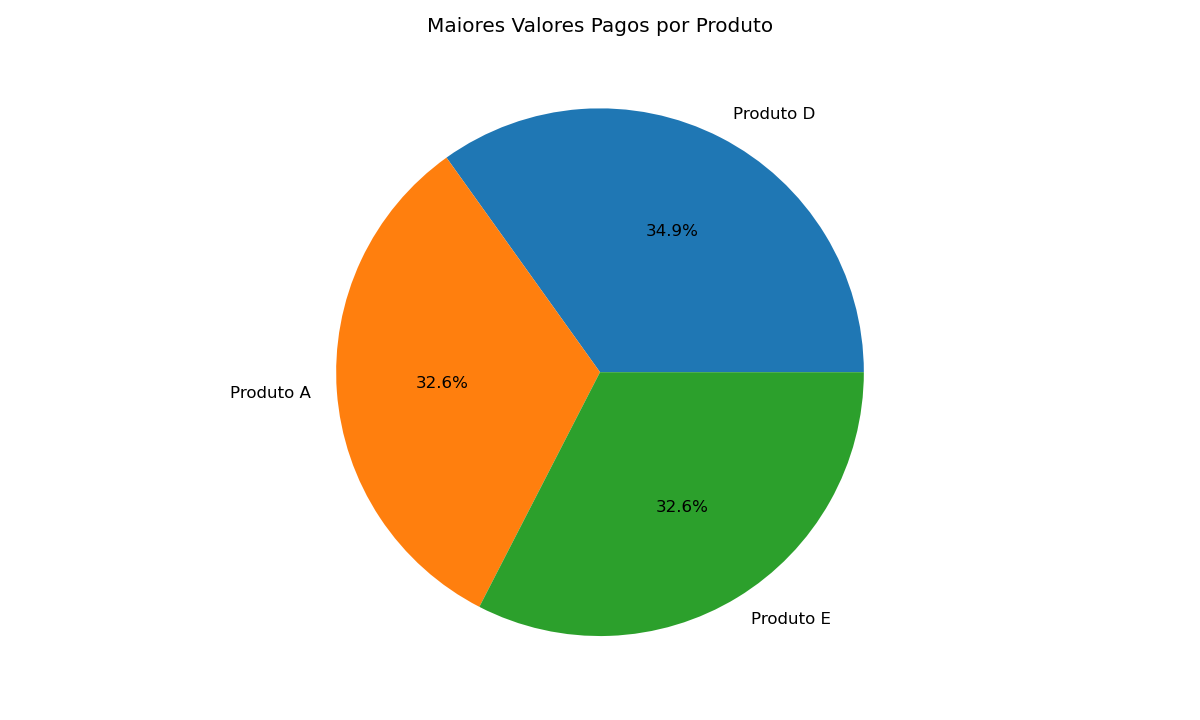

In [237]:
pergunta = "Gere um gráfico de pizza com SOMENTE os 3 produtos que apresentaram os maiores valores pagos."
thread_id = "thread_id_1"
process_question(pergunta,thread_id)

DEBUG: Revisão 1/3 - Query gerada
DEBUG: QA Engineer - ACEITO - Revisão 1



Deseja plotar o gráfico? (sim/não):  sim



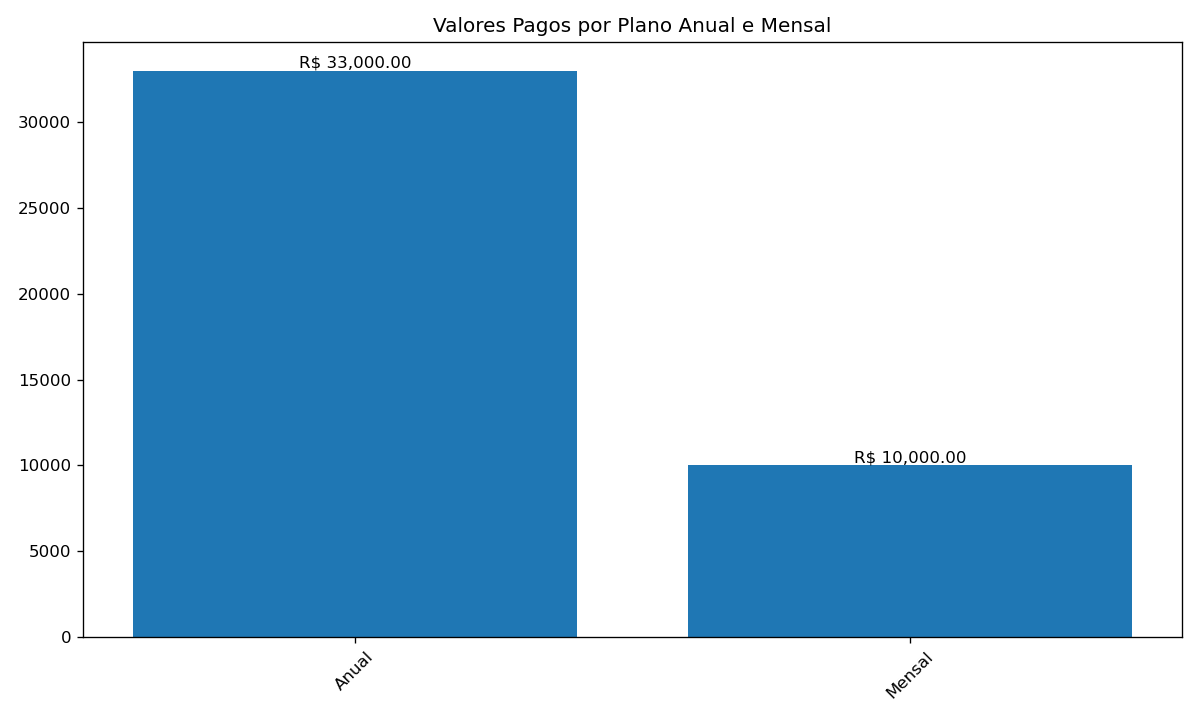

In [239]:
pergunta = "Agora me mostre o valor pago SOMENTE dos produtos apresentados na resposta anterior. Quero que, no gráfico, sejam apresentadas 2 colunas com OS MESMOS valores DA RESPOSTA ANTERIOR agregados POR PLANO e não por produto."
thread_id = "thread_id_1"
process_question(pergunta,thread_id)

DEBUG: Revisão 1/3 - Query gerada
DEBUG: QA Engineer - ACEITO - Revisão 1



Deseja plotar o gráfico? (sim/não):  sim



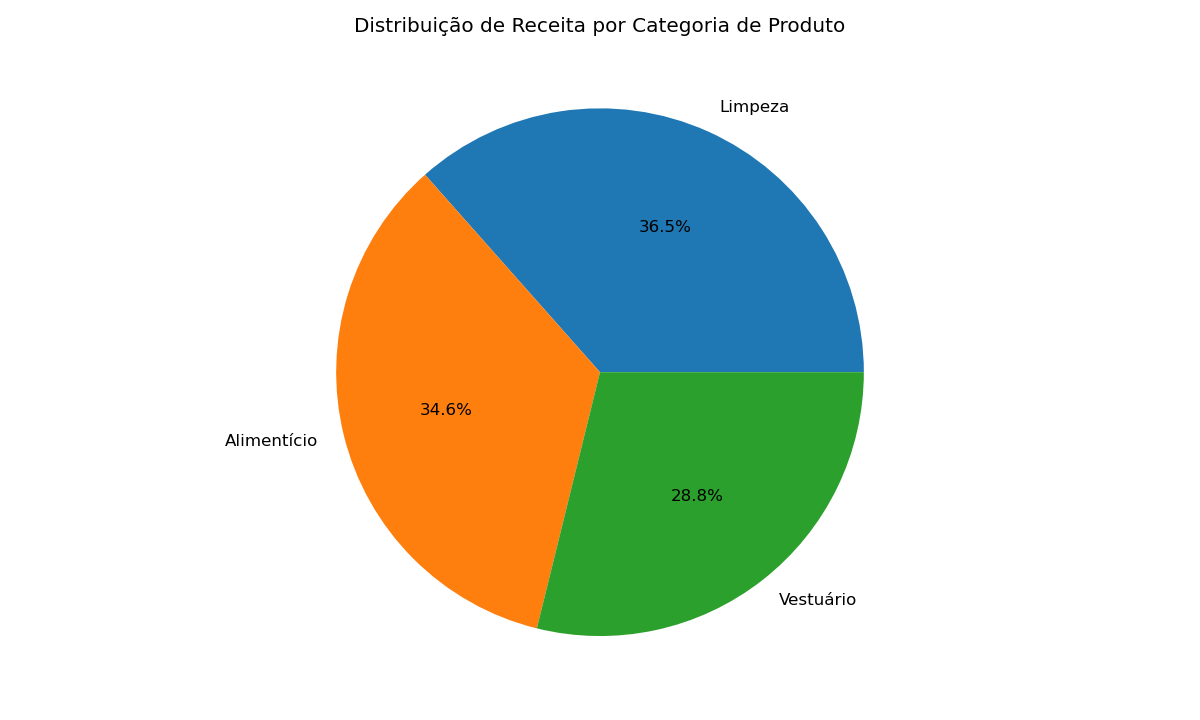

In [241]:
pergunta = "Agora me mostre ESSES MESMOS DADOS DA RESPOSTA ANTERIOR em um gráfico de pizza"
thread_id = "thread_id_2"
process_question(pergunta,thread_id)
# Note que mesmo pedindo para ele trazer as informações com o mesmos dados, ele pega todo o contexto do banco e está trazendo as Categorias porque eu mudei a thread_id.

DEBUG: Revisão 1/3 - Query gerada
DEBUG: QA Engineer - ACEITO - Revisão 1



Deseja plotar o gráfico? (sim/não):  sim



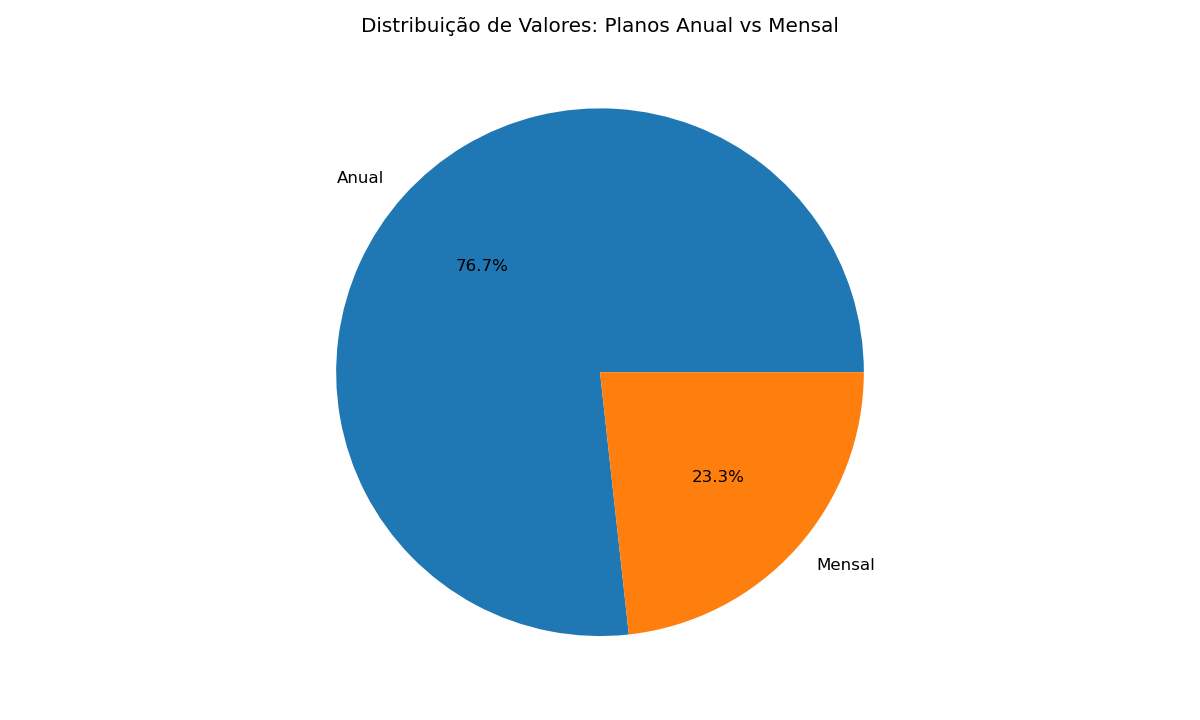

In [243]:
pergunta = "Agora me mostre ESSES MESMOS DADOS em um gráfico de pizza"
thread_id = "thread_id_1"
process_question(pergunta,thread_id)
# Voltei a chamar a thread_id_1. Ele voltou a entender o contexto dos produtos D, A, E do contexto dessa thread. E dividiu por Plano, como era o contexto

DEBUG: Revisão 1/3 - Query gerada
DEBUG: QA Engineer - ACEITO - Revisão 1



Deseja plotar o gráfico? (sim/não):  sim



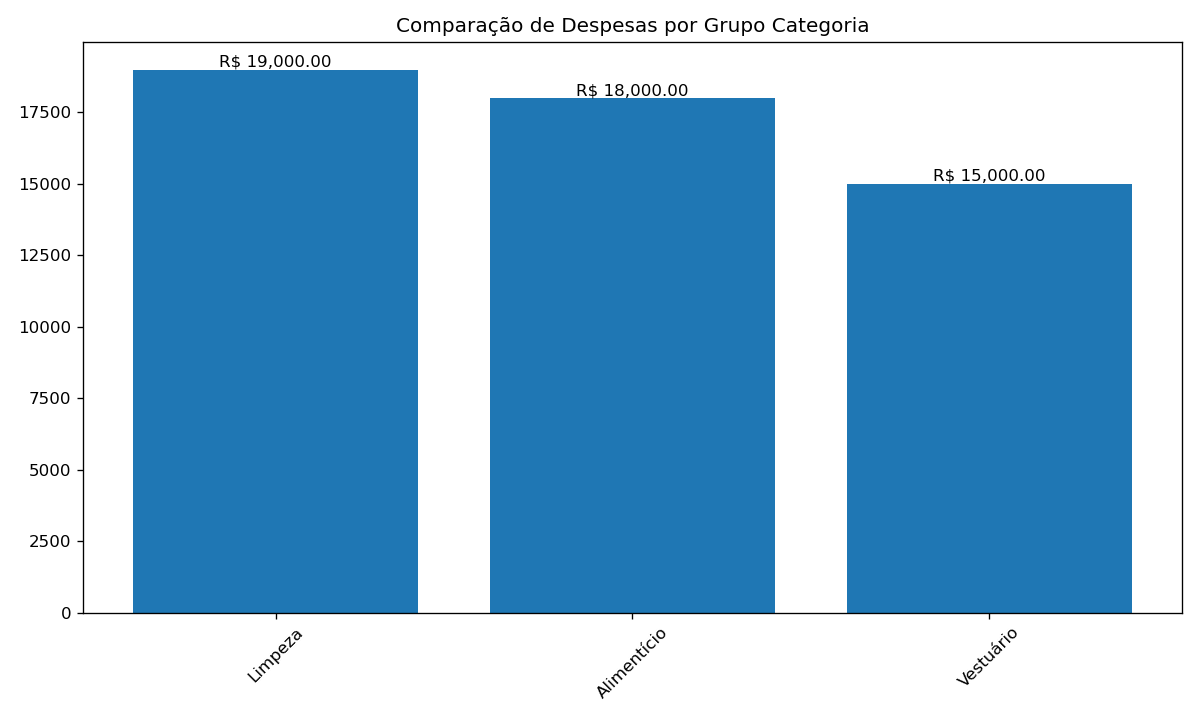

In [245]:
pergunta = "Agora me mostre ESSES MESMOS DADOS DA RESPOSTA ANTERIOR em um gráfico de barra"
thread_id = "thread_id_2"
process_question(pergunta,thread_id)
# Como agora chamei a thread_id_2, o Agente entendeu que o contexto seria referente às Categorias.

DEBUG: Revisão 1/3 - Query gerada
DEBUG: QA Engineer - REJEITADO - Revisão 1
DEBUG: Chief DBA forneceu feedback para revisão 1
DEBUG: Revisão 2/3 - Query gerada
DEBUG: QA Engineer - ACEITO - Revisão 2



Deseja plotar o gráfico? (sim/não):  sim



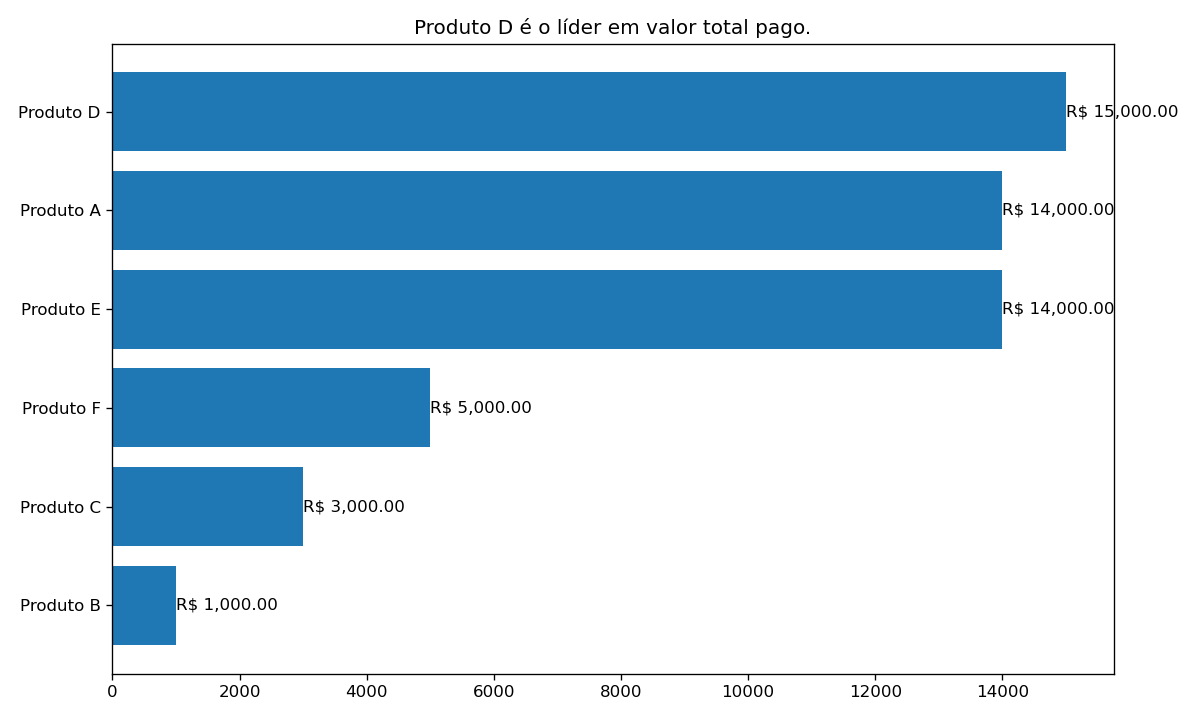

In [247]:
pergunta = "Dentre todos os produtos qual foi aquele que apresentou o maior valor pago total?"
thread_id = "thread_id_3"
process_question(pergunta,thread_id)

DEBUG: Revisão 1/3 - Query gerada
DEBUG: QA Engineer - ACEITO - Revisão 1



Deseja plotar o gráfico? (sim/não):  sim



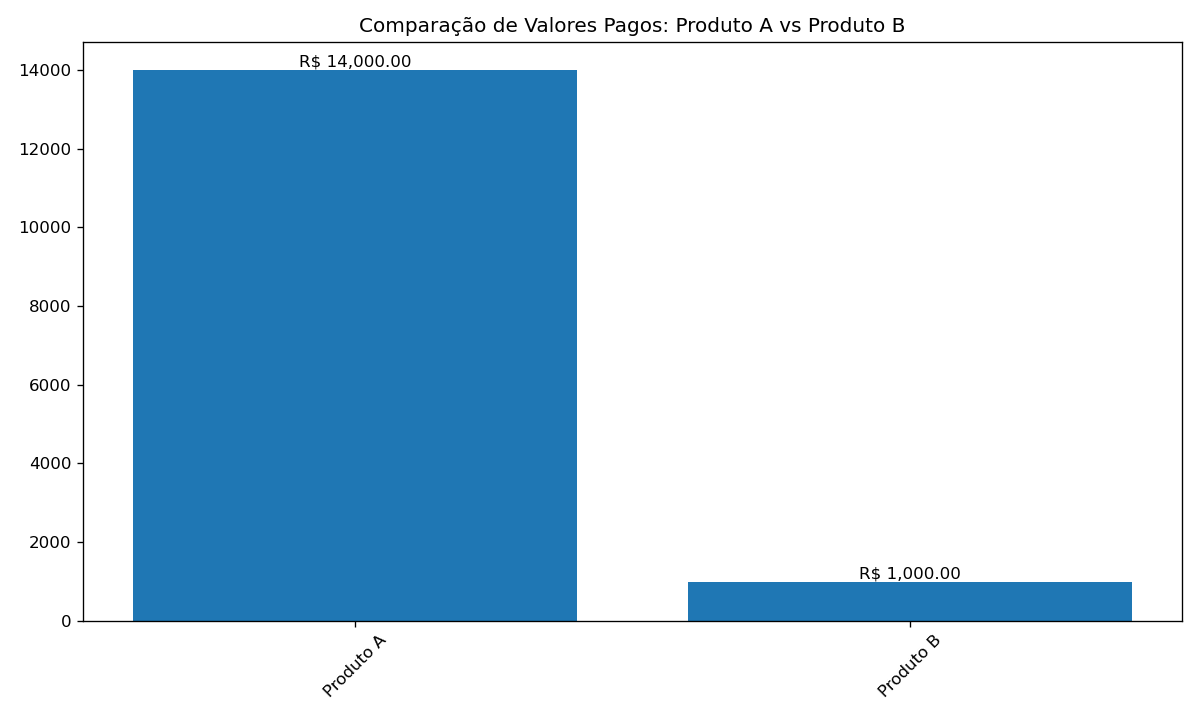

In [249]:
pergunta = "Qual o valor pago do Produto A e qual o valor pago do Produto B?"
thread_id = "thread_id_4"
process_question(pergunta,thread_id)

In [251]:
pergunta = "Tudo bem?"
thread_id = "thread_id_5"
process_question(pergunta,thread_id)

In [253]:
pergunta = "Qual é a capital do Brasil?"
thread_id = "thread_id_6"
process_question(pergunta,thread_id)

DEBUG: Revisão 1/3 - Query gerada
DEBUG: QA Engineer - REJEITADO - Revisão 1
DEBUG: Chief DBA forneceu feedback para revisão 1
DEBUG: Revisão 2/3 - Query gerada
DEBUG: QA Engineer - ACEITO - Revisão 2



Deseja plotar o gráfico? (sim/não):  sim



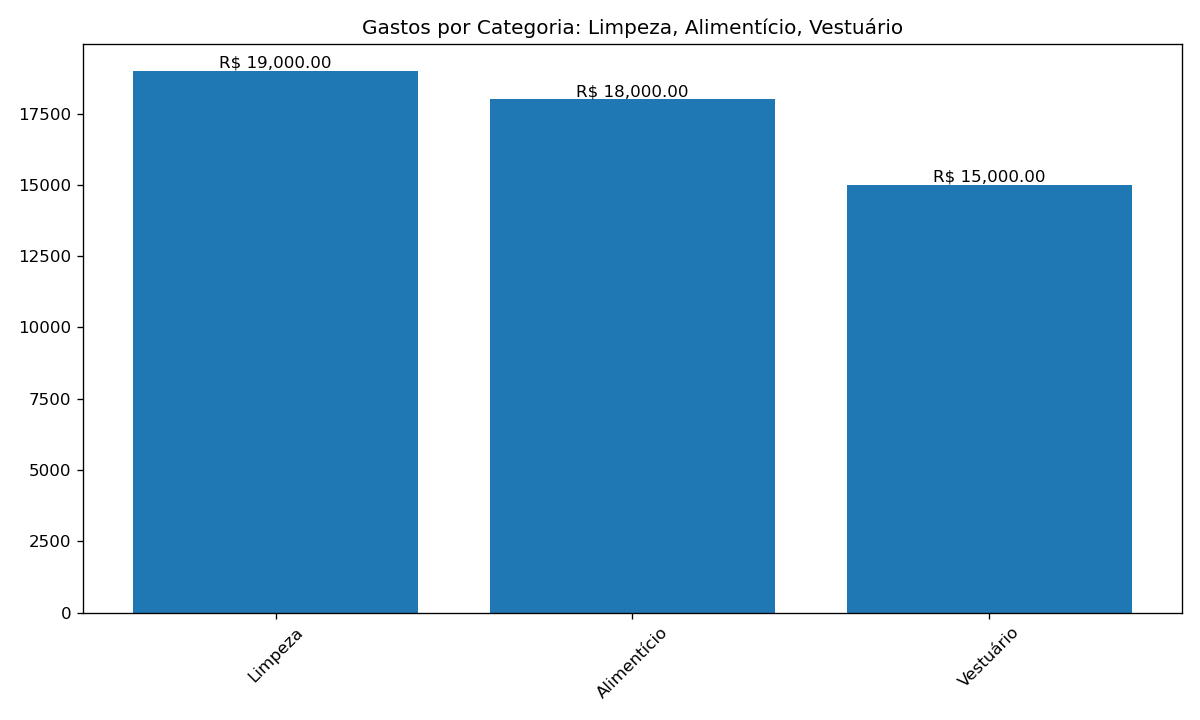

In [255]:
pergunta = "Gere um gráfico do valor pago por categoria."
thread_id = "thread_id_7"
process_question(pergunta,thread_id)

DEBUG: Revisão 1/3 - Query gerada
DEBUG: QA Engineer - REJEITADO - Revisão 1
DEBUG: Chief DBA forneceu feedback para revisão 1
DEBUG: Revisão 2/3 - Query gerada
DEBUG: QA Engineer - ACEITO - Revisão 2



Deseja plotar o gráfico? (sim/não):  sim



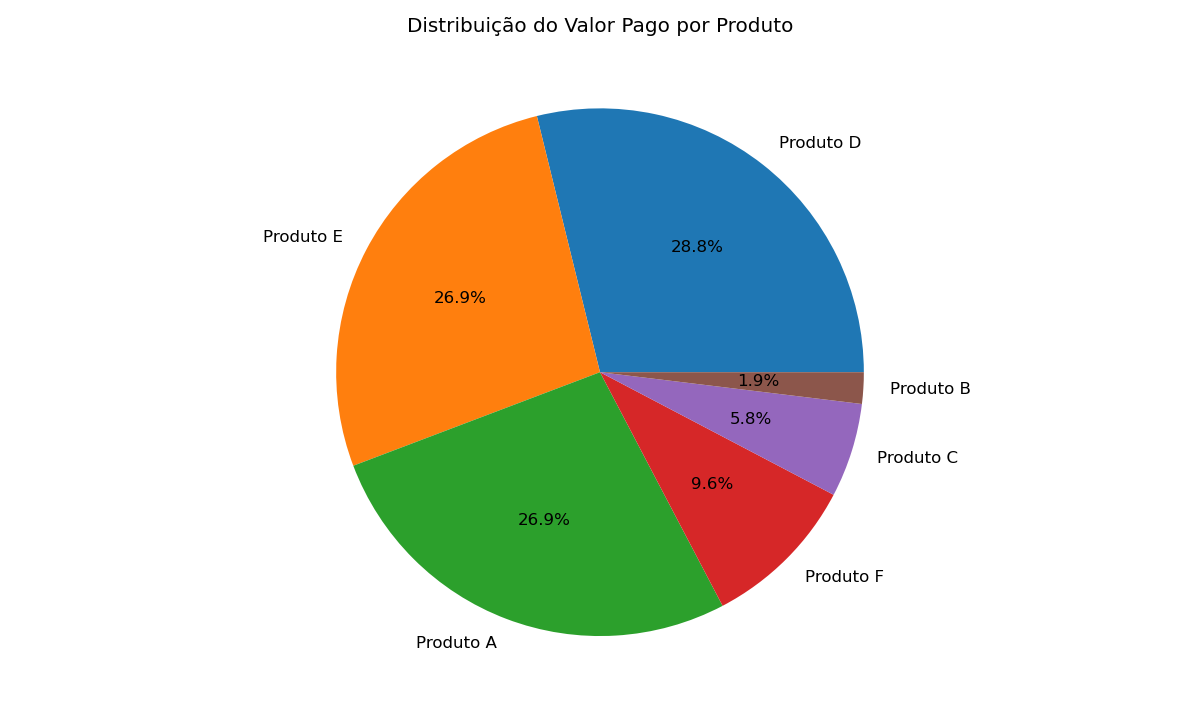

In [257]:
pergunta = "Gere um gráfico de pizza do valor pago por produto."
thread_id = "thread_id_8"
process_question(pergunta,thread_id)

In [86]:
pergunta = "Me informe qual foi o valor pago da categoria de Limpeza?"
thread_id = "thread_id_9"
process_question(pergunta,thread_id)

DEBUG: Revisão 1/3 - Query gerada
DEBUG: QA Engineer - ACEITO - Revisão 1
